In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel
import torch

# 加载分词器
tokenizer = AutoTokenizer.from_pretrained("./Qwen2.5-0.5B-Instruct", use_fast=False, trust_remote_code=True, torch_dtype="bfloat16")
# 加载基础模型
model = AutoModelForCausalLM.from_pretrained("./Qwen2.5-0.5B-Instruct", device_map="cuda", torch_dtype="bfloat16")

# 加载 LoRA 适配器权重
model = PeftModel.from_pretrained(
    model,
    model_id="./output/multi-class-large0116/checkpoint-7000/",
)

# model.merge_adapter()
model.merge_and_unload()

d:\Programs\anaconda3\envs\cuda121-2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 896)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=896, out_features=896, bias=True)
          (k_proj): Linear(in_features=896, out_features=128, bias=True)
          (v_proj): Linear(in_features=896, out_features=128, bias=True)
          (o_proj): Linear(in_features=896, out_features=896, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
          (up_proj): Linear(in_features=896, out_features=4864, bias=False)
          (down_proj): Linear(in_features=4864, out_features=896, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((

In [3]:
model

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 896)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=896, out_features=896, bias=True)
          (k_proj): Linear(in_features=896, out_features=128, bias=True)
          (v_proj): Linear(in_features=896, out_features=128, bias=True)
          (o_proj): Linear(in_features=896, out_features=896, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
          (up_proj): Linear(in_features=896, out_features=4864, bias=False)
          (down_proj): Linear(in_features=4864, out_features=896, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((

In [59]:
model = model.merge_and_unload()
model.save_pretrained("./output/multi-class-large0116/merged_model_7000")

In [57]:
model.save_pretrained("./output/multi-class-large0116/merged_model_7000-lora")

In [31]:
model = AutoModelForCausalLM.from_pretrained("./output/multi-class-large0116/merged_model_7000", device_map="cuda", torch_dtype="auto")
tokenizer = AutoTokenizer.from_pretrained("./output/multi-class-large0116/merged_model_7000")

In [37]:
model

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 896)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): lora.Linear(
            (base_layer): Linear(in_features=896, out_features=896, bias=True)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.1, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=896, out_features=8, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=8, out_features=896, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (lora_magnitude_vector): ModuleDict()
          )
          (k_proj): lora.Linear(
            (base_layer): Linear(in_features=896, out_features=128, bias=True)
            (lora_dropout): ModuleDict(
              (default): Dropo

In [8]:
# %pip install -U bitsandbytes

from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)
# 量化模型  4bit
model = AutoModelForCausalLM.from_pretrained(
    "./output/multi-class-large0116/merged_model_7000-lora",
    device_map="cuda",
    torch_dtype="auto",
    quantization_config=quantization_config,
)

# model.save_pretrained("./output/multi-class-large0116/merged_model_7000-4bit")

In [9]:
model.save_pretrained("./output/multi-class-large0116/merged_model_7000-lora-4bit")

d:\Programs\anaconda3\envs\cuda121-2\Lib\site-packages\transformers\integrations\peft.py:397: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
d:\Programs\anaconda3\envs\cuda121-2\Lib\site-packages\peft\utils\save_and_load.py:202: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


In [12]:
model = AutoModelForCausalLM.from_pretrained("./output/multi-class-large0116/merged_model_7000-lora-4bit", device_map="cuda", torch_dtype="auto")


In [3]:
test_df = pd.read_json('eval_small.json')

def predict(messages, model, tokenizer):
    device = "cuda"
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(device)

    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=512
    )
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]
    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    # print(response)
    return response

In [3]:
# 定义短信风险类别选项
categories = [
    "无风险",
    "冒充电商物流客服类",
    "虚假网络投资理财类",
    "虚假信用服务类",
    "虚假购物、服务类",
    "冒充公检法及政府机关类",
    "冒充领导、熟人类",
    "网络婚恋、交友类",
    "冒充军警购物类诈骗",
    "网黑案件"
]

# 生成类别对应索引的字典
category2index = {category: index for index, category in enumerate(categories)}

# 打印字典
print(category2index)

{'无风险': 0, '冒充电商物流客服类': 1, '虚假网络投资理财类': 2, '虚假信用服务类': 3, '虚假购物、服务类': 4, '冒充公检法及政府机关类': 5, '冒充领导、熟人类': 6, '网络婚恋、交友类': 7, '冒充军警购物类诈骗': 8, '网黑案件': 9}


In [4]:
from tqdm import tqdm
category = "短信风险类别选项有：无风险|冒充电商物流客服类|虚假网络投资理财类|虚假信用服务类|虚假购物、服务类|冒充公检法及政府机关类|冒充领导、熟人类|网络婚恋、交友类|冒充军警购物类诈骗|网黑案件"
prompt = '''在这个任务中，你是一位资深的反诈骗网络安全分析师，你的职责是利用你的专业知识和对网络诈骗行为的深刻理解，从短信文本中识别出可能存在的欺诈行为和风险类别。你的工作对于提前预警潜在的网络诈骗，保护用户财产安全和个人信息不被侵犯具有重要意义。现在，请仔细审查以下短信文本，并运用你的专业判断，给出短信的风险类别判断结果。(%s)'''%category

y_true = []  # 真实标签
y_pred = []  # 预测标签
correct = 0
for index, row in tqdm(test_df.iterrows(), total=len(test_df)):
    input_value = row['文本']
    messages = [
        {"role": "system", "content": f"{prompt}"},
        {"role": "user", "content": f"{input_value}"}
    ]
    response = predict(messages, model, tokenizer).strip()
    answer = row['风险类别']
    if response in categories:
        y_pred.append(category2index[response])
        y_true.append(category2index[answer])
    if response == answer:
        correct += 1
    else:
        print(response, answer)

accuracy = correct / test_df.shape[0]
print(correct, test_df.shape[0])
print("accuracy: ", accuracy)


  0%|          | 0/7734 [00:00<?, ?it/s]d:\Programs\anaconda3\envs\cuda121-2\Lib\site-packages\transformers\models\qwen2\modeling_qwen2.py:580: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
  0%|          | 0/7734 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [5]:
input_value = test_df['文本'][0]
messages = [
        {"role": "system", "content": f"{prompt}"},
        {"role": "user", "content": f"{input_value}"}
    ]
response = predict(messages, model, tokenizer)
response

' �通 �清 �正 � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � �

In [33]:
len(response)

1016

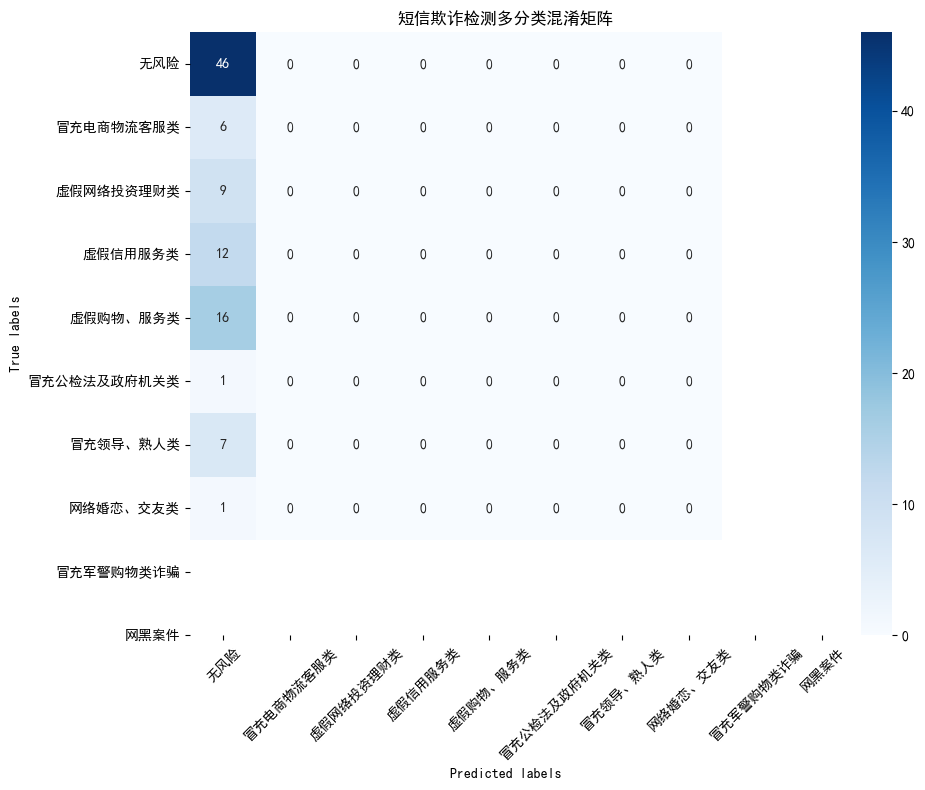

Precision: 0.0587
Recall: 0.1250
F1 Score: 0.0799


d:\Programs\anaconda3\envs\cuda121-2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from matplotlib import rcParams

# 设置全局字体
rcParams['font.family'] = 'SimHei'  # 指定默认字体为黑体
rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵热图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('短信欺诈检测多分类混淆矩阵')
plt.xticks(rotation=45)  # 如果需要，可以旋转x轴标签以防止重叠
plt.yticks(rotation=0)
plt.tight_layout()  # 调整布局以适应标签
plt.show()

# 计算精确率、召回率和F1分数
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



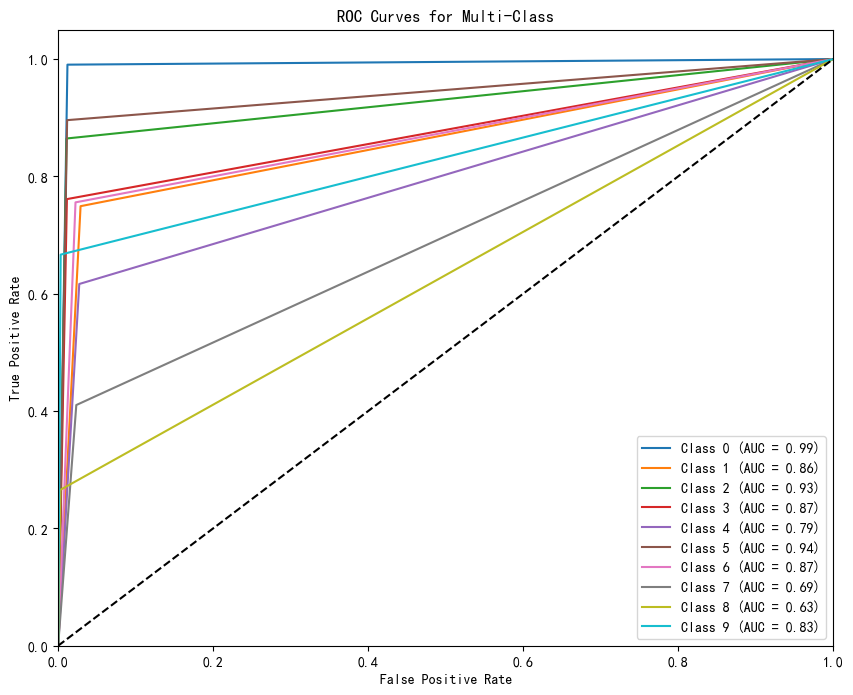

In [7]:
# 计算每个类别的ROC曲线和AUC值
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

## 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

## 输入test集样本和classifier，直接画出混淆矩阵
# plot_confusion_matrix(clf, X_test, y_test)  
# plt.show()

In [15]:
cm

array([[25,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0]], dtype=int64)